# Variables aléatoires discrètes

## 1 Exemple introductif

On considère le jeu suivant : « on lance deux dés équilibrés. On gagne le montant indiqué par la somme des deux dés.»

Appelons X la variable aléatoire du montant gagné.

### 1.1 Calculs exacts

Déterminons les gains pour toutes les issues possibles :

In [2]:
gains = []
for de1 in range(1,6+1):
    for de2 in range(1,6+1):
        gains.append(de1+de2)

print(gains)

[2, 3, 4, 5, 6, 7, 3, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 9, 5, 6, 7, 8, 9, 10, 6, 7, 8, 9, 10, 11, 7, 8, 9, 10, 11, 12]


Déterminons la loi de probabilité :

In [3]:
import numpy as np
omegax = list(range(2,12+1))
loi = []
for k in omegax:
    pk = gains.count(k) / len(gains)
    loi.append((k,pk))
print(loi)

[(2, 0.027777777777777776), (3, 0.05555555555555555), (4, 0.08333333333333333), (5, 0.1111111111111111), (6, 0.1388888888888889), (7, 0.16666666666666666), (8, 0.1388888888888889), (9, 0.1111111111111111), (10, 0.08333333333333333), (11, 0.05555555555555555), (12, 0.027777777777777776)]


Calcul de l’espérance :

In [4]:
esperance = 0
for (k,pk) in loi:
    esperance += k * pk
print(esperance)

6.999999999999999


Calcul de la variance :

In [5]:
variance = 0
for (k,pk) in loi:
    variance = variance + (k ** 2) * pk
variance = variance - esperance ** 2
print(variance)

5.833333333333336


### 1.2 Simulation

Imaginons maintenant que nous nous intéressions à la somme de 10 dés. L’énumération des 60466176 issues possibles est un peu laborieuse, même avec itertools. Nous allons donc utiliser la simulation.

Soit X la variable aléatoire qui associe à une issue, la somme des dés qui la composent.

**Loi de probabilité**

Les valeurs que peut prendre X sont les suivantes : 10,11,...,59,60.

Nous allons estimer la probabilité que X prenne chacune de ces valeurs.

On considère la fonction simulation_experience() qui simule le lancer de dix dés à six faces.

In [6]:
import random

def simulation_experience():
    return random.choices([1, 2, 3, 4, 5, 6], k=10)

On définit la fonction associée à X :

In [7]:
def fun_X(des):
    return sum(des)

On écrit enfin la fonction simulation_repetee(exp, X, nrep) qui répète rep fois, indépendamment, l’expérience définie dans la fonction exp, et calcule, à chaque répétition, la valeur de la variable aléatoire en utilisant la fonction X. Cette fonction retourne la liste des valeurs calculées.

In [8]:
def simulation_repetee(exp, X, nrep):
    return [X(exp()) for _ in range(nrep)]

On peut alors définir des fonctions d’estimation de loi de probabilité et de calcul d’espérance/variance :

In [9]:
import random
import numpy

def estimation_loi(valeurs_obtenues, valeurs_possibles):
    # Ensemble des valeurs différentes possibles
    # prises par la variable aléatoire
    omegax = valeurs_possibles
    # On calcule ensuite le nombre de fois où chaque
    # valeur de Omega_X apparait dans l'ensemble des valeurs 
    # que l'on divise par le nombre de répétitions (i.e. le nombre de valeurs)
    res = []
    for k in omegax :
        res.append((k, valeurs_obtenues.count(k) / len(valeurs_obtenues)))
    return res

Exemple :

In [10]:
valeurs_simulees = simulation_repetee(simulation_experience, fun_X, 1000)
loi = estimation_loi(valeurs_simulees, list(range(10,60+1)))
print(loi)

[(10, 0.0), (11, 0.0), (12, 0.0), (13, 0.0), (14, 0.0), (15, 0.0), (16, 0.0), (17, 0.0), (18, 0.0), (19, 0.0), (20, 0.002), (21, 0.002), (22, 0.0), (23, 0.005), (24, 0.007), (25, 0.008), (26, 0.022), (27, 0.028), (28, 0.034), (29, 0.034), (30, 0.046), (31, 0.05), (32, 0.062), (33, 0.077), (34, 0.076), (35, 0.077), (36, 0.063), (37, 0.068), (38, 0.063), (39, 0.055), (40, 0.046), (41, 0.051), (42, 0.036), (43, 0.024), (44, 0.024), (45, 0.012), (46, 0.013), (47, 0.008), (48, 0.002), (49, 0.003), (50, 0.002), (51, 0.0), (52, 0.0), (53, 0.0), (54, 0.0), (55, 0.0), (56, 0.0), (57, 0.0), (58, 0.0), (59, 0.0), (60, 0.0)]


Représentation graphique de cette loi :

In [11]:
import matplotlib
import matplotlib.pyplot as plt

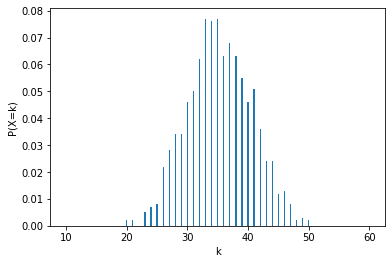

In [12]:
x = []
y = []
for (k,pk) in loi :
    x.append(k)
    y.append(pk)
plt.figure()
plt.bar(x,height = y, width = 0.2)
plt.xlabel("k")
plt.ylabel("P(X=k)")
plt.show()

**Cas où OmegaX est difficile à déterminer**

Lorsque OmegaX est difficile à déterminer on ne peut le reconstruire qu’en observant les différentes obtenues par simulation.

Cependant il arrive que certaines valeurs -possibles mais rares- de X, n’apparaissent pas. Les événements associés étant plutôt exceptionnels, ils ont pu « échapper » à notre simulation.

Il est donc nécessaire d’effectuer un nombre très important de répétitions afin de « couvrir » le mieux possible OmegaX (sans certitude d’obtenir l’ensemble des valeurs possibles).

Pour reconstruire OmegaX, on pourra utiliser la très pratique fonction unique() de numpy et modifier la fonction estimation_loi() :

In [13]:
def estimation_loi(valeurs_obtenues, valeurs_possibles = None):
    # On détermine Omega_X
    if valeurs_possibles is None :
        omegax = numpy.unique(valeurs_obtenues)
    else :
        omegax = valeurs_possibles
    # On calcule ensuite le nombre de fois où chaque
    # valeur de Omega_X apparait dans l'ensemble des valeurs 
    # que l'on divise par le nombre de répétitions (i.e. le nombre de valeurs)
    res = []
    for k in omegax :
        res.append((k, valeurs_obtenues.count(k) / len(valeurs_obtenues)))
    return res

Exemple :

In [14]:
valeurs_simulees = simulation_repetee(simulation_experience, fun_X, 10000)
loi = estimation_loi(valeurs_simulees)
print(loi)

[(16, 0.0001), (18, 0.0003), (19, 0.0017), (20, 0.0022), (21, 0.002), (22, 0.0032), (23, 0.0073), (24, 0.0106), (25, 0.0142), (26, 0.019), (27, 0.0271), (28, 0.0346), (29, 0.0388), (30, 0.0458), (31, 0.058), (32, 0.0617), (33, 0.0711), (34, 0.0678), (35, 0.078), (36, 0.0665), (37, 0.073), (38, 0.0612), (39, 0.0491), (40, 0.0477), (41, 0.041), (42, 0.0339), (43, 0.0257), (44, 0.0203), (45, 0.0142), (46, 0.0099), (47, 0.0059), (48, 0.0036), (49, 0.0025), (50, 0.0007), (51, 0.001), (52, 0.0001), (53, 0.0001), (54, 0.0001)]


Affichage :

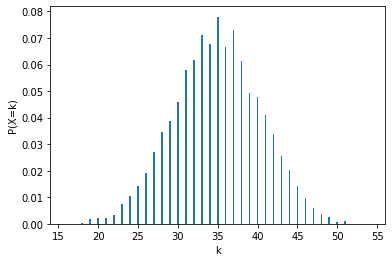

In [15]:
x = []
y = []
for (k,pk) in loi :
    x.append(k)
    y.append(pk)
plt.figure()
plt.bar(x,height = y, width = 0.2)
plt.xlabel("k")
plt.ylabel("P(X=k)")
plt.show()

## 2 Exercices

### 2.1 5000 simplifié

On jette 5 dés. On gagne alors un nombre de points correspondant à la somme des points que chaque dé rapporte :

    As : 100 points
    5 : 50 points
    2,3,4,6 : 0 point

Soit X la v.a. du nombre de points obtenus en lançant une fois les 5 dés.

1. Déterminer la loi de probabilité de X
2. Déterminer l’espérance de X
3. Déterminer la variance de X

In [16]:
def cinqmille(X):
    gains=[]
    for i in range(X):
        compte=0
        for nb_des in range(5):
            de = random.randint(1,6)
            if de == 1:
                compte += 100
            if de == 5:
                compte += 50
        gains.append(compte)
    #print(gains)

    omegax = list(range(0,500+1,50)) #Anticipation des valeurs possibles
    loi = []
    for k in omegax:
        pk = gains.count(k) / len(gains)
        loi.append((k,pk)) #Valeurs possible, nb d'obtenus en X coups
    print(loi)
    
    esperance = 0
    for (k,pk) in loi:
        esperance += k * pk
    print(esperance)
    
    variance = 0
    for (k,pk) in loi:
        variance += (k ** 2) * pk
    variance -= esperance ** 2
    print(variance)
    
    return None

print(cinqmille(1000))

[(0, 0.134), (50, 0.163), (100, 0.23), (150, 0.198), (200, 0.14), (250, 0.081), (300, 0.037), (350, 0.011), (400, 0.005), (450, 0.001), (500, 0.0)]
126.5
7502.75
None


In [17]:
def cinqmilleV2(X):
    gains=[]
    for i in range(X):
        compte=0
        for nb_des in range(5):
            de = random.randint(1,6)
            if de == 1:
                compte += 100
            if de == 5:
                compte += 50
        gains.append(compte)
    #print(gains)

    omegax = np.unique(gains) #Valeurs obtenues
    loi = []
    for k in omegax:
        pk = gains.count(k) / len(gains)
        loi.append((k,pk))
    print(loi)
    
    esperance = 0
    for (k,pk) in loi:
        esperance += k * pk
    print(esperance)
    
    variance = 0
    for (k,pk) in loi:
        variance += (k ** 2) * pk
    variance -= esperance ** 2
    print(variance)
    
    return None

print(cinqmilleV2(1000))

[(0, 0.136), (50, 0.17), (100, 0.23), (150, 0.181), (200, 0.156), (250, 0.069), (300, 0.04), (350, 0.009), (400, 0.008), (450, 0.001)]
125.9
7684.189999999999
None


### 2.2 Sanction pifométrique

Un enseignant excédé par le bruit dans un amphi décide de punir aléatoirement un étudiant (de la promo constituée de 110 individus) chaque semaine. On sait que 90% des étudiants bavardent en amphi. On suppose que chaque semaine, l’enseignant ne tient pas compte de l’historique dans son tirage aléatoire. L’enseignant applique ce système de sanction pendant 13 semaines. On désigne par X le nombre de punitions « à tort ».

1. En procédant par simulation, déterminer la table de la loi de probabilité de X
2. Son espérance.
3. Sa variance.

In [75]:
def sanctionPi(X):
    gains=[]
    for y in range(X):
        compte = 0
        for i in range(13):
            tirage = np.random.choice(['bavardeur','calme'], 1, replace = True, p=[0.9,0.1])
            if tirage == 'calme':
                compte += 1 #à tort
        gains.append(compte)
    #print(gains)
        
    omegax = np.unique(gains)
    loi = []
    for k in omegax:
        pk = gains.count(k) / len(gains)
        loi.append((k,pk))
    print(loi)
    
    esperance = 0
    for (k,pk) in loi:
        esperance += k * pk
    print("Esperance : ",esperance)
    
    variance = 0
    for (k,pk) in loi:
        variance += (k ** 2) * pk
    variance -= esperance ** 2
    
    return "Variance : ",variance
        
print(sanctionPi(1000))

[(0, 0.252), (1, 0.369), (2, 0.255), (3, 0.099), (4, 0.021), (5, 0.003), (6, 0.001)]
Esperance :  1.2810000000000001
('Variance : ', 1.086039)


### 2.3 Sanction pifométrique améliorée

L’année suivante l’enseignant décide de tenir compte de l’historique des santions. Il retire donc, lors de son tirage hebdomadaire, les élèves déjà sanctionnés les semaines précédentes. On désigne par Y le nombre de punitions « à tort ».

1. En procédant par simulation, déterminer la table de la loi de probabilité de Y
2. Son espérance.
3. Sa variance.

In [117]:
import random

def sanctionPiV2(Y):
    gains=[]
    for y in range(Y):
        eleves = 99*['bavardeur'] + 11*['calme']
        compte = 0
        for i in range(13):
            rand_idx = random.randint(0, len(eleves)-1)
            if eleves[rand_idx] == 'calme':
                compte += 1 #à tort
            eleves.pop(rand_idx)
        gains.append(compte)
    #print(gains)
    
    omegax = np.unique(gains)
    loi = []
    for k in omegax:
        pk = gains.count(k) / len(gains)
        loi.append((k,pk))
    print(loi)
    
    esperance = 0
    for (k,pk) in loi:
        esperance += k * pk
    print("Esperance : ",esperance)
    
    variance = 0
    for (k,pk) in loi:
        variance += (k ** 2) * pk
    variance -= esperance ** 2
    
    return "Variance : ", variance

print(sanctionPiV2(10000))

[(0, 0.2285), (1, 0.3888), (2, 0.261), (3, 0.0978), (4, 0.0202), (5, 0.0033), (6, 0.0004)]
Esperance :  1.3039
('Variance : ', 1.0329447900000002)


### 2.4 La planche de Galton

« Des clous sont plantés sur la partie supérieure de la planche, de telle sorte qu’une bille lâchée sur la planche passe soit à droite soit à gauche pour chaque rangée de clous. Dans la partie inférieure les billes sont rassemblées en fonction du nombre de passages à gauche et de passage à droite qu’elles ont fait. » (Wikipedia)

Nous allons simuler cette expérience.

L’arrivée d’une bille sur un clou peut conduire la bille à aller sur la gauche ou sur la droite (de manière équiprobable).

Sur son parcours, une bille rencontre n clous (elle peut donc arriver dans une case parmi les n + 1 , que l’on pourra numéroter de 0 à n). On note X la variable aléatoire correspondant au nombre de fois où la bille est allée sur la droite.

Ainsi, lorsque X vaut 0, la bille arrive dans la première case, lorsque X vaut 1 la bille arrive dans la seconde, et lorsque X vaut n, elle arrive dans la dernière case.

1. Supposons qu’il y ait 5 rangées de clous (n = 5). Simuler le lancer de 100 000 billes et représenter les effectifs des différentes cases sur un graphique (oui, vous l’avez compris, on représente la loi de probabilité de X ; et oui, X suit bien une loi binômiale).


2. Même question avec 1 000 000 billes et n = 10

In [83]:
def Galton(nrep, n):
    gains = []
    for y in range(nrep):
        compte = 0
        for i in range(n):
            direction = random.randint(1,2)
            # 1 = gauche ; 2 = droite
            if direction == 2:
                compte += 1
        gains.append(compte)
        
    omegax = np.unique(gains)
    loi = []
    for k in omegax:
        pk = gains.count(k) / len(gains)
        loi.append((k,pk))
    print(loi)
    
    esperance = 0
    for (k,pk) in loi:
        esperance += k * pk
    print("Esperance : ",esperance)
    
    variance = 0
    for (k,pk) in loi:
        variance += (k ** 2) * pk
    variance -= esperance ** 2
    
    return "Variance : ", variance

print(Galton(100000, 5))
print("")
print(Galton(1000000, 10))

[(0, 0.03161), (1, 0.15666), (2, 0.31223), (3, 0.31157), (4, 0.1569), (5, 0.03103)]
Esperance :  2.49858
('Variance : ', 1.2529579836)

[(0, 0.000964), (1, 0.009798), (2, 0.044444), (3, 0.116841), (4, 0.205038), (5, 0.246439), (6, 0.205093), (7, 0.117134), (8, 0.043626), (9, 0.00967), (10, 0.000953)]
Esperance :  4.9976199999999995
('Variance : ', 2.4980683356000064)


## 3 Du discret au continu : activité préparatoire

In [106]:
def proba1(nrep):
    gains = []
    for y in range(nrep):
        compte = 0
        number = random.random()
        if number == 0.1110432:
            compte = 1
        gains.append(compte)
    
    omegax = np.unique(gains)
    loi = []
    for k in omegax:
        pk = gains.count(k) / len(gains)
        loi.append((k,pk))
    return loi

def proba2(nrep):
    gains = []
    for y in range(nrep):
        compte = 0
        number = random.random()
        if number == 0.8130119:
            compte = 1
        gains.append(compte)
    
    omegax = np.unique(gains)
    loi = []
    for k in omegax:
        pk = gains.count(k) / len(gains)
        loi.append((k,pk))
    return loi

def proba3(nrep):
    gains = []
    for y in range(nrep):
        compte = 0
        number = random.random()
        if number >= 0.5 and number <= 0.8:
            compte = 1
        gains.append(compte)
    
    omegax = np.unique(gains)
    loi = []
    for k in omegax:
        pk = gains.count(k) / len(gains)
        loi.append((k,pk))
    return loi

print(proba1(10000000))
print(proba2(10000000))
print(proba3(10000000))

[(0, 1.0)]
[(0, 1.0)]
[(0, 0.7000511), (1, 0.2999489)]
